### Tf-Idf Explore

In [9]:
corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer()
v.fit(corpus)

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [ ]:
dir(v)

In [11]:
v.vocabulary_

{'thor': 25,
 'eating': 10,
 'pizza': 22,
 'loki': 17,
 'is': 16,
 'ironman': 15,
 'ate': 7,
 'already': 0,
 'apple': 5,
 'announcing': 4,
 'new': 20,
 'iphone': 14,
 'tomorrow': 26,
 'tesla': 24,
 'model': 19,
 'google': 12,
 'pixel': 21,
 'microsoft': 18,
 'surface': 23,
 'amazon': 2,
 'eco': 11,
 'dot': 9,
 'am': 1,
 'biryani': 8,
 'and': 3,
 'you': 27,
 'are': 6,
 'grapes': 13}

In [14]:
v.vocabulary_['thor']

25

In [13]:
v.idf_[25]

np.float64(2.386294361119891)

In [17]:
all_features_names = v.get_feature_names_out()
all_features_names

array(['already', 'am', 'amazon', 'and', 'announcing', 'apple', 'are',
       'ate', 'biryani', 'dot', 'eating', 'eco', 'google', 'grapes',
       'iphone', 'ironman', 'is', 'loki', 'microsoft', 'model', 'new',
       'pixel', 'pizza', 'surface', 'tesla', 'thor', 'tomorrow', 'you'],
      dtype=object)

In [23]:
for word in all_features_names:
    word_idx = v.vocabulary_[word]
    print(word,"| Idf Score ==>",v.idf_[word_idx])

already | Idf Score ==> 2.386294361119891
am | Idf Score ==> 2.386294361119891
amazon | Idf Score ==> 2.386294361119891
and | Idf Score ==> 2.386294361119891
announcing | Idf Score ==> 1.2876820724517808
apple | Idf Score ==> 2.386294361119891
are | Idf Score ==> 2.386294361119891
ate | Idf Score ==> 2.386294361119891
biryani | Idf Score ==> 2.386294361119891
dot | Idf Score ==> 2.386294361119891
eating | Idf Score ==> 1.9808292530117262
eco | Idf Score ==> 2.386294361119891
google | Idf Score ==> 2.386294361119891
grapes | Idf Score ==> 2.386294361119891
iphone | Idf Score ==> 2.386294361119891
ironman | Idf Score ==> 2.386294361119891
is | Idf Score ==> 1.1335313926245225
loki | Idf Score ==> 2.386294361119891
microsoft | Idf Score ==> 2.386294361119891
model | Idf Score ==> 2.386294361119891
new | Idf Score ==> 1.2876820724517808
pixel | Idf Score ==> 2.386294361119891
pizza | Idf Score ==> 2.386294361119891
surface | Idf Score ==> 2.386294361119891
tesla | Idf Score ==> 2.386294361

In [33]:
transformed_output = v.transform(corpus)
transformed_output.shape

(7, 28)

In [32]:
transformed_output.toarray()[:2]

array([[0.24266547, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24266547, 0.        , 0.        ,
        0.40286636, 0.        , 0.        , 0.        , 0.        ,
        0.24266547, 0.11527033, 0.24266547, 0.        , 0.        ,
        0.        , 0.        , 0.72799642, 0.        , 0.        ,
        0.24266547, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.30652086,
        0.5680354 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5680354 ,
        0.        , 0.26982671, 0.        , 0.        , 0.        ,
        0.30652086, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30652086, 0.        ]])

### Problem Statement: Given a description about a product sold on e-commerce website, classifying it in one of the 4 categories


- This data consists of two columns.

| Text | Label | 
| --- | --- |
| Indira Designer Women's Art Mysore Silk Saree With Blouse Piece (Star-Red) This Saree Is Of Art Mysore Silk & Comes With Blouse Piece. | Clothing & Accessories | 
|IO Crest SY-PCI40010 PCI RAID Host Controller Card Brings new life to any old desktop PC. Connects up to 4 SATA II high speed SATA hard disk drives. Supports Windows 8 and Server 2012|Electronics|
|Operating Systems in Depth About the Author Professor Doeppner is an associate professor of computer science at Brown University. His research interests include mobile computing in education, mobile and ubiquitous computing, operating systems and distribution systems, parallel computing, and security.|Books|

- ***Text***: Description of an item sold on e-commerce website
- ***Label***: Category of that item. Total 4 categories: "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.


### Load Dataset

In [34]:
import pandas as pd

In [36]:
df = pd.read_csv('Ecommerce_data.csv')
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [37]:
df.shape

(24000, 2)

In [38]:
df.label.value_counts()

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

In [40]:
df['label_num'] = df['label'].map({
    'Household' : 0,
    'Books': 1,
    'Electronics': 2,
    'Clothing & Accessories': 3
})

In [41]:
df.head()

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3


### Without Preprocessing

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    df.Text,
    df.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=df.label_num

)

#### using knn

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

clf.fit(X_train,y_train)

,steps,"[('tfidf', ...), ('knn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [50]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.97      0.95      0.96      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.98      0.97      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



#### using naive bayes

In [51]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nv', MultinomialNB())
])

clf.fit(X_train,y_train)

,steps,"[('tfidf', ...), ('nv', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [52]:
y_pred = clf.predict(X_test)

report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1200
           1       0.98      0.92      0.95      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.99      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



#### using random forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nv', RandomForestClassifier())
])

clf.fit(X_train,y_train)

,steps,"[('tfidf', ...), ('nv', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [54]:
y_pred = clf.predict(X_test)

report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.97      0.97      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



### With Preprocessing
* Applying Stemming and Lemmatization

In [80]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [64]:
def preprocess(text):
    doc = nlp(text)
    text_prepo = []
    
    for token in doc:
        if not token.is_stop and not token.is_punct: 
            text_prepo.append(token.lemma_)
    return " ".join(text_prepo)
    

In [65]:
preprocess(("I and thor are willing to went ate supermarket in amstradam !!"))

'thor willing went eat supermarket amstradam'

In [79]:
df['prepo_text'] = df['Text'].apply(preprocess)

In [81]:
df.head()

,Text,label,label_num,prepo_text
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner Low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2,IO Crest SY PCI40010 PCI RAID Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3,Indira Designer woman Art Mysore Silk Saree Bl...


In [84]:
len(df.Text[0]),len(df.prepo_text[0])

(597, 397)

In [85]:
X_train,X_test,y_train,y_test = train_test_split(
    df.prepo_text,
    df.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=df.label_num

)

#### using ramdom forest

In [86]:
clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nv', RandomForestClassifier())
])

clf.fit(X_train,y_train)

,steps,"[('tfidf', ...), ('nv', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [87]:
y_pred = clf.predict(X_test)

report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.97      0.98      1200
           3       0.98      0.99      0.99      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



In [91]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[1158,    9,   16,   17],
       [  19, 1173,    5,    3],
       [  21,    7, 1169,    3],
       [   6,    6,    0, 1188]])

In [108]:
labels = ['Household','Books','Electronics','Clothing & Accessories']

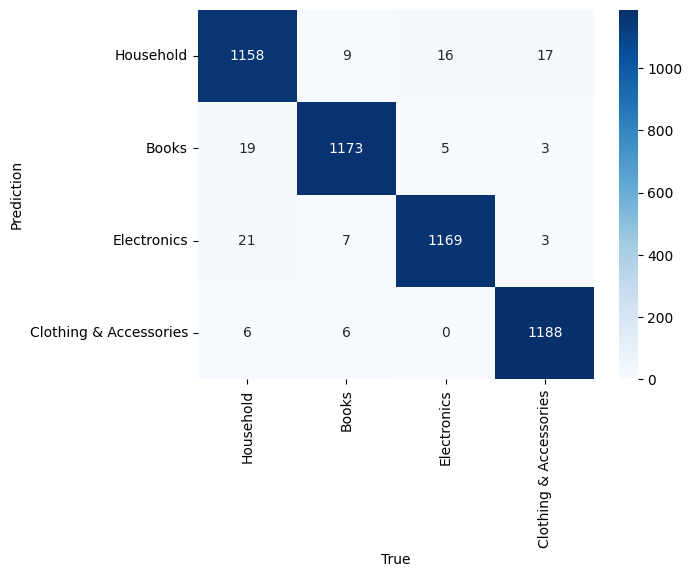

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=labels,yticklabels=labels)
plt.xlabel('True')
plt.ylabel('Prediction')

plt.show()